In [27]:
import pandas as pd
import numpy as np
import pickle

import altair as alt


# importing local libraries for drawings (because they clutter)
# in Github, you can search  
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
from lib.builders import people,towns,nations,culture as c
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

In [28]:
culture = c.Culture()
culture.eons

10

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

Culture settings come from the user input, there are defaults for everything. Once specified the `.culture` placeholder can be replaced. It should not be used until this point. 

In [29]:
world.culture = culture

#### Blank world from the `landscape` age

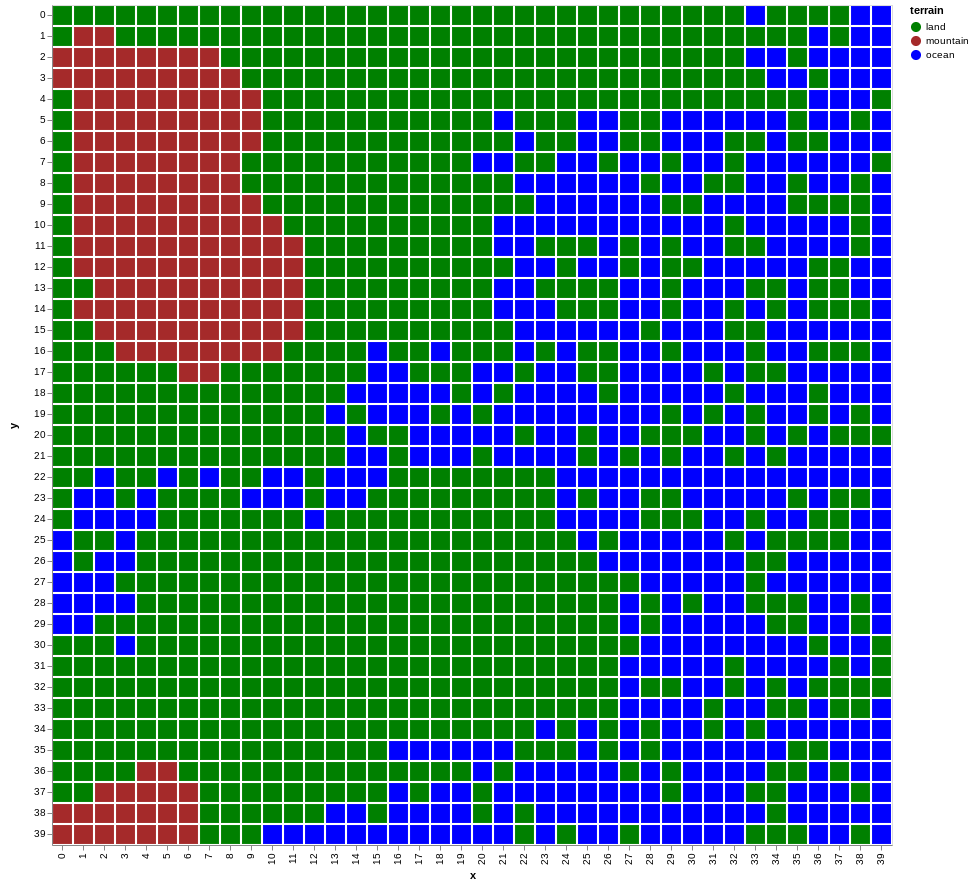

In [30]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

## People
A `Person` is a required parameter for many things like `towns`, `nations` and `buildings`

A person requires a `culture` to specify how the names will be generated. As a default the person is a `peon` and exists nowhere (`None`). Optional parameters allow the person to be created with a `role` and a `location`. `Location` can be a `town`, `building` or a `key` where the person can be found. 

In [31]:
people.Person(world.culture,location=world.get_random_chord())

Illiaklipace, peon, residing in [19  2]

When a new `Town` is created it is created with a person

In [32]:
new_town = towns.Town(world.get_random_chord(),1,culture,people)
new_town

town of Icespring: population: 1 location: [18,4] founded 1

In [33]:
new_town.speaker

Ekocklut, Speaker of Icespring, residing in Icespring

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [34]:
all_towns = towns.build_towns(world,people)
all_towns

[town of Badgermoral: population: 4 location: [25,30] founded 0,
 town of Ratfellow: population: 7 location: [11,24] founded 0,
 town of Hellmoral: population: 6 location: [3,17] founded 1,
 town of Hardpike: population: 4 location: [11,20] founded 1,
 town of Ratbridge: population: 3 location: [33,4] founded 1,
 town of Doomplace: population: 4 location: [16,28] founded 2,
 town of Fallgarden: population: 4 location: [10,38] founded 2,
 town of Snakevale: population: 3 location: [13,0] founded 2,
 town of Waterhenge: population: 4 location: [1,30] founded 3,
 town of Starrise: population: 2 location: [1,31] founded 3,
 town of Foundersmoral: population: 2 location: [33,34] founded 3,
 town of Badgercrawl: population: 3 location: [8,19] founded 4,
 town of Demonscatch: population: 2 location: [18,5] founded 4,
 town of Soillair: population: 3 location: [9,6] founded 5,
 town of Foundershail: population: 4 location: [2,3] founded 5,
 town of Founderschild: population: 4 location: [20,4]

In [35]:
[p.speaker for p in all_towns]

[Lexac, Speaker of Badgermoral, residing in Badgermoral,
 Rosassod, Speaker of Ratfellow, residing in Ratfellow,
 Towillunt, Speaker of Hellmoral, residing in Hellmoral,
 Zhardich, Speaker of Hardpike, residing in Hardpike,
 Alsassath, Speaker of Ratbridge, residing in Ratbridge,
 Stackrun, Speaker of Doomplace, residing in Doomplace,
 Kipprab, Speaker of Fallgarden, residing in Fallgarden,
 Groddut, Speaker of Snakevale, residing in Snakevale,
 Jareshim, Speaker of Waterhenge, residing in Waterhenge,
 Voharkir, Speaker of Starrise, residing in Starrise,
 Nehorkim, Speaker of Foundersmoral, residing in Foundersmoral,
 Trayaker, Speaker of Badgercrawl, residing in Badgercrawl,
 Lalda, Speaker of Demonscatch, residing in Demonscatch,
 Roppec, Speaker of Soillair, residing in Soillair,
 Rofillech, Speaker of Foundershail, residing in Foundershail,
 Leplort, Speaker of Founderschild, residing in Founderschild,
 Noldrunt, Speaker of Badgerfort, residing in Badgerfort,
 Chaglem, Speaker of P

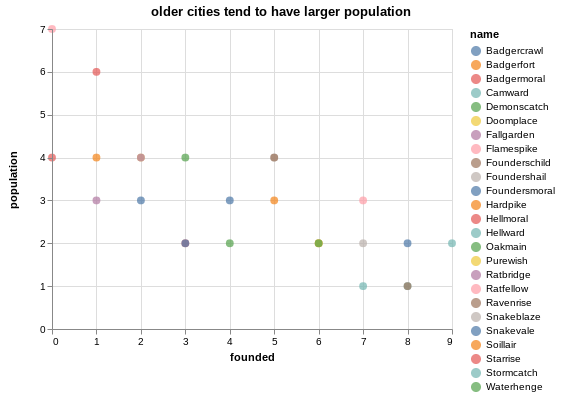

In [36]:
def population_age(towns):
    df = pd.DataFrame(index=range(len(all_towns)))
    df['name'] = [t.name for t in all_towns]
    df['population'] = [t.pop for t in all_towns]
    df['founded'] = [t.founded for t in all_towns]
    return df

alt.Chart(population_age(towns),title="older cities tend to have larger population").mark_circle(size=60).encode(
    y='population',
    x='founded',
    color='name',
    tooltip=['name']
)

There are convinience functions to fetch individual towns. 

In [37]:
towns.get_town(all_towns,all_towns[2].name)

town of Hellmoral: population: 6 location: [3,17] founded 1

In [38]:
world.df_features.head()

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,18.0,0,0:0,18.0,land
1:0,0,21.0,1,1:0,21.0,land
2:0,0,18.0,2,2:0,18.0,land
3:0,0,16.0,3,3:0,16.0,land
4:0,0,14.0,4,4:0,14.0,land


In [39]:
world.add_features(all_towns)

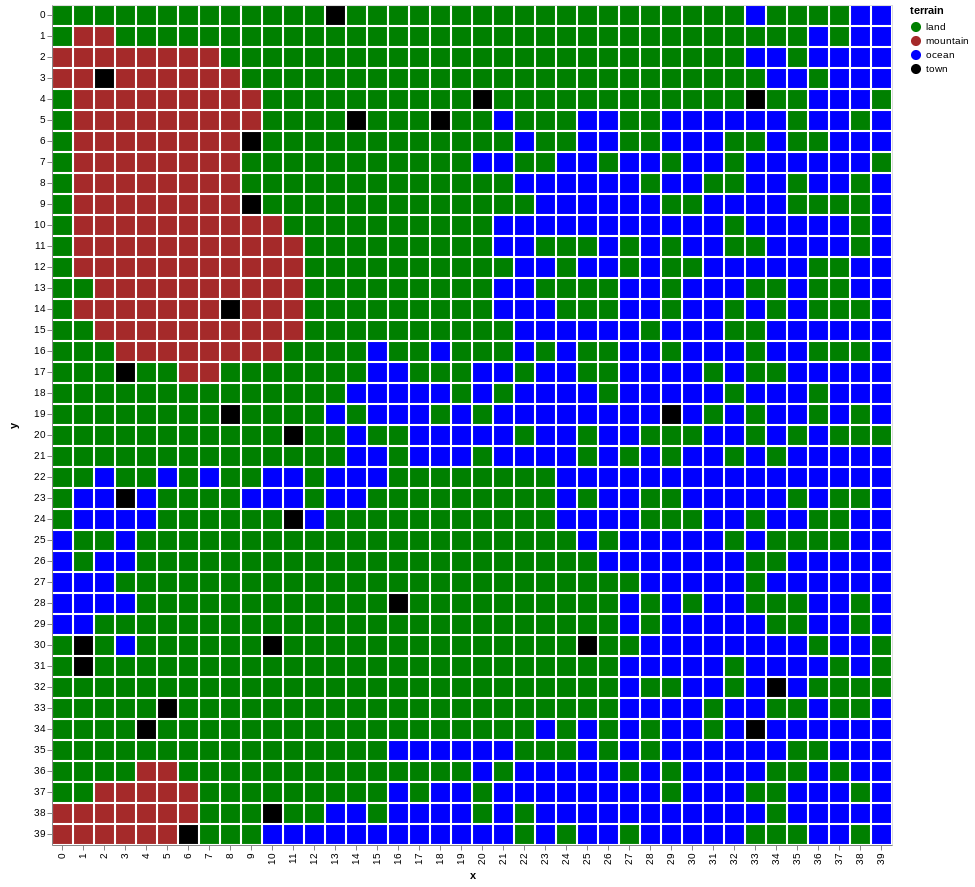

In [40]:
draw.drawCities(world.df_features)

In [41]:
world.df_features[world.df_features['feature'].isna()==False]

,y,rainfall,x,key,elevation,terrain,feature
key,,,,,,,
13:0,0,17.0,13,13:0,17.0,town,Snakevale
2:3,3,32.0,2,2:3,32.0,town,Foundershail
20:4,4,18.0,20,20:4,5.0,town,Founderschild
33:4,4,42.0,33,33:4,1.0,town,Ratbridge
14:5,5,6.0,14,14:5,4.0,town,Snakeblaze
18:5,5,6.0,18,18:5,2.0,town,Demonscatch
9:6,6,28.0,9,9:6,25.0,town,Soillair
9:9,9,31.0,9,9:9,28.0,town,Foundersmoral
8:14,14,53.0,8,8:14,49.0,town,Ravenrise


In [42]:
#k is the actual k_means cluster object.
all_nations,k = nations.cluster_nations(world)

world.nations = all_nations

all_nations

{0: 'Lilywish',
 1: 'Snowloch',
 2: 'Gleamcraft',
 3: 'Flamecoil',
 4: 'Flameward',
 5: 'Ravencrest',
 6: 'Splitplace',
 7: 'Stenchfellow'}

In [43]:
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
world.df_features = nations.predict_nations(k,world)
world.df_features.head(20)

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
0:0,0,18.0,0,0:0,18.0,land,NaN,1.0,Snowloch
1:0,0,21.0,1,1:0,21.0,land,NaN,1.0,Snowloch
2:0,0,18.0,2,2:0,18.0,land,NaN,1.0,Snowloch
3:0,0,16.0,3,3:0,16.0,land,NaN,1.0,Snowloch
4:0,0,14.0,4,4:0,14.0,land,NaN,1.0,Snowloch
5:0,0,12.0,5,5:0,12.0,land,NaN,1.0,Snowloch
6:0,0,14.0,6,6:0,14.0,land,NaN,1.0,Snowloch
7:0,0,13.0,7,7:0,13.0,land,NaN,1.0,Snowloch
8:0,0,12.0,8,8:0,12.0,land,NaN,1.0,Snowloch


In [45]:
world.towns

In [46]:
world.towns = all_towns
for t in all_towns:
    try:
        t.set_starting_fielty(world)
    except:
        continue
        
town = world.towns[1]
print(f"{town.name} is loyal to the nation of {town.nation}")
print(f"{town.diplomacy}")

Ratfellow is loyal to the nation of Ravencrest
{'nation': 'Ravencrest', 'national fealty': 1}


In [47]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(world.df_features['nation'].dropna()):
    c = world.df_features[(world.df_features['nation']==n)& \
          (world.df_features['terrain']=='town')]['feature'].tolist()
    #getting the town objects
    ts = [t for t in all_towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
all_towns

[capitol of Badgermoral: population: 4 location: [25,30] founded 0,
 capitol of Ratfellow: population: 7 location: [11,24] founded 0,
 capitol of Hellmoral: population: 6 location: [3,17] founded 1,
 town of Hardpike: population: 4 location: [11,20] founded 1,
 capitol of Ratbridge: population: 3 location: [33,4] founded 1,
 town of Doomplace: population: 4 location: [16,28] founded 2,
 capitol of Fallgarden: population: 4 location: [10,38] founded 2,
 town of Snakevale: population: 3 location: [13,0] founded 2,
 town of Waterhenge: population: 4 location: [1,30] founded 3,
 town of Starrise: population: 2 location: [1,31] founded 3,
 town of Foundersmoral: population: 2 location: [33,34] founded 3,
 town of Badgercrawl: population: 3 location: [8,19] founded 4,
 town of Demonscatch: population: 2 location: [18,5] founded 4,
 town of Soillair: population: 3 location: [9,6] founded 5,
 capitol of Foundershail: population: 4 location: [2,3] founded 5,
 capitol of Founderschild: populatio

In [48]:
world.nations = [nations.Nation(n,world,world.culture,people) for n in world.nations.values()]
world.nations

[Nation of Lilywish,
 Nation of Snowloch,
 Nation of Gleamcraft,
 Nation of Flamecoil,
 Nation of Flameward,
 Nation of Ravencrest,
 Nation of Splitplace,
 Nation of Stenchfellow]

In [49]:
world.nations[0].ruler

Ferdor, Ruler of the nation of Lilywish, residing in Fallgarden

In [50]:
world.df_features[world.df_features['feature'].isna()==False].sort_values(['nation'])

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
11:20,20,11.0,11,11:20,4.0,town,Hardpike,3.0,Flamecoil
3:23,23,12.0,3,3:23,1.0,town,Purewish,3.0,Flamecoil
8:19,19,17.0,8,8:19,11.0,town,Badgercrawl,3.0,Flamecoil
3:17,17,46.0,3,3:17,20.0,town,Hellmoral,3.0,Flamecoil
8:14,14,53.0,8,8:14,49.0,town,Ravenrise,3.0,Flamecoil
13:0,0,17.0,13,13:0,17.0,town,Snakevale,4.0,Flameward
14:5,5,6.0,14,14:5,4.0,town,Snakeblaze,4.0,Flameward
20:4,4,18.0,20,20:4,5.0,town,Founderschild,4.0,Flameward
18:5,5,6.0,18,18:5,2.0,town,Demonscatch,4.0,Flameward


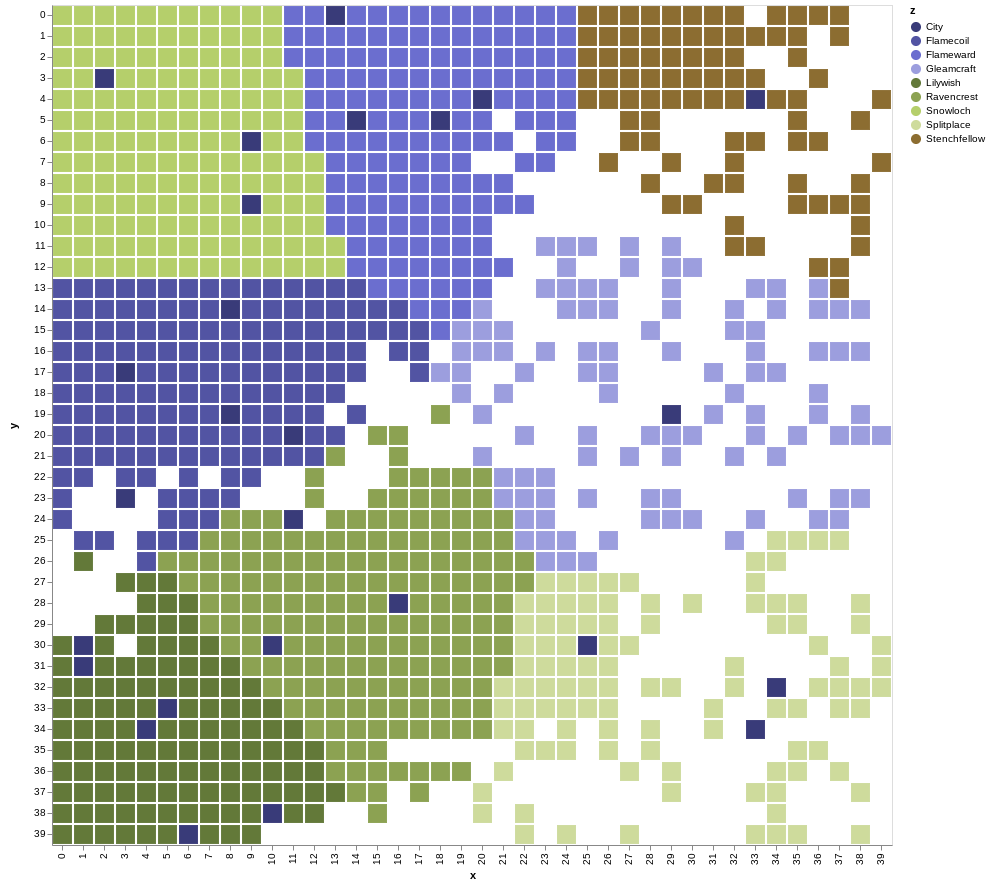

In [51]:
draw.drawboarders(world.df_features)

In [52]:
world.towns = all_towns

with open('world_2.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)